In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import seaborn as sns

# 주제 : 서울시 구별 CCTV 현황 분석

## (1) Data Definition

+ CCTV 현황 : http://data.seoul.go.kr/dataList/OA-2734/F/1/datasetView.do
+ 서울시 인구 : https://data.seoul.go.kr/dataList/419/S/2/datasetView.do
+ https://truman.tistory.com/175

In [2]:
#### CCTV 자료

cctv_seoul = pd.read_csv("data/seoul/cctv.csv")
cctv_seoul.head()

,기관명,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [4]:
#엑셀파일에서 필요한 것만 불러오기
pop_seoul=pd.read_excel("data/seoul/Report.xls", usecols="B, D, G, J, N", header=2)
#header=2는 두칸 건너뛴게 제목이 된다는 의미
pop_seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


## (2) EDA & Preprocessing

### (2-1) 컬럼 이름 변경

In [5]:
# CCTV 자료에서 '기관명'이라는 컬럼을 '구별'로 변경

cctv_seoul.rename(columns={"기관명":"구별"}, inplace=True)#inplace=True : 원본에 반영
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [6]:
# 인구 데이터에서 컬럼명을 각각 구별, 인구수, 한국인, 외국인, 고령자로 변경

pop_seoul.columns=['구별', '인구수', '한국인', '외국인', '고령자']
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10112070,9838892,273178,1382420
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752


### (2-2) CCTV 현황 탐색

+ 어느 구가 가장 CCTV가 가장 많이 설치되어있는가?
+ 또는 가장 적게 설치되어있는가?

In [10]:
cctv_seoul.sort_values(["소계"])#적은 순
cctv_seoul.sort_values(["소계"], ascending=False)#많은 순
cctv_seoul.sort_values(["소계"])[["구별", "소계"]] #적은순으로 구별과 소계만
cctv_seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,3238,1292,430,584,932
1,강동구,1010,379,99,155,377
2,강북구,831,369,120,138,204
3,강서구,911,388,258,184,81
4,관악구,2109,846,260,390,613


In [13]:
# CCTV 설치증가율에 따라 가장 높은 구와 가장 낮은 구를 탐색
# CCTV의 설치 연도별 증가율을 구해서 '최근증가율' 파생변수 추가
# ((2014+2015+2016)/2013년도 이전)*100

cctv_seoul['최근증가율']=(cctv_seoul['2016년']+cctv_seoul['2015년']+cctv_seoul["2014년"])/cctv_seoul["2013년도 이전"]*100
cctv_seoul.head()

print(cctv_seoul.sort_values(by="최근증가율", ascending=False).head(3))
print("-----------------------------------------------------------------")
print(cctv_seoul.sort_values(by="최근증가율", ascending=True).head(3))

     구별    소계  2013년도 이전  2014년  2015년  2016년       최근증가율
22  종로구  1619        464    314    211    630  248.922414
9   도봉구   825        238    159     42    386  246.638655
12  마포구   980        314    118    169    379  212.101911
-----------------------------------------------------------------
      구별    소계  2013년도 이전  2014년  2015년  2016년      최근증가율
18   양천구  2482       1843    142     30    467  34.671731
13  서대문구  1254        844     50     68    292  48.578199
20   용산구  2096       1368    218    112    398  53.216374


### (2-3) 인구 데이터 전처리

In [16]:
# 필요없는 행 삭제(첫번째 행 삭제) : drop, dell

pop_seoul.drop([0], inplace=True)
pop_seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,164348,154549,9799,26429
2,중구,135139,126082,9057,21655
3,용산구,245411,229909,15502,37238
4,성동구,314551,306532,8019,41752
5,광진구,371671,357149,14522,44470


In [21]:
# 구별 데이터의 증복이나 결측치 등을 확인

print(len(pop_seoul['구별'].unique()))#중복제거 후 전체 갯수
print(pop_seoul['구별'].count())#결측치 제거 후 전체 갯수

pop_seoul[pop_seoul['구별'].isnull()]

26
25


,구별,인구수,한국인,외국인,고령자
26,NaN,0,0,0,0


In [22]:
# 결측치 삭제

pop_seoul.drop([26], inplace=True)

In [23]:
print(len(pop_seoul['구별'].unique()))
print(pop_seoul['구별'].count())

25
25


### (2-4) 인구 데이터 현황 탐색

In [27]:
# 구별(전체, 외국인, 고령자) 인구수 탐색(어느 구가 가장 많고 가장 적은지)

print(pop_seoul.sort_values(by='인구수', ascending=False).head())
print(pop_seoul.sort_values(by='인구수', ascending=True).head())

print("--------------------------------------------------------------")

print(pop_seoul.sort_values(by='외국인', ascending=False).head())
print(pop_seoul.sort_values(by="외국인", ascending=True).head())

print("--------------------------------------------------------------")

print(pop_seoul.sort_values(by='고령자', ascending=False).head())
print(pop_seoul.sort_values(by='고령자', ascending=True).head())

     구별     인구수     한국인    외국인    고령자
24  송파구  671994  665282   6712  77978
16  강서구  608361  601696   6665  77381
23  강남구  557865  552976   4889  65859
11  노원구  555803  551902   3901  75081
21  관악구  522292  504445  17847  70807
     구별     인구수     한국인    외국인    고령자
2    중구  135139  126082   9057  21655
1   종로구  164348  154549   9799  26429
3   용산구  245411  229909  15502  37238
18  금천구  253344  234238  19106  34640
4   성동구  314551  306532   8019  41752
--------------------------------------------------------------
      구별     인구수     한국인    외국인    고령자
19  영등포구  403988  369128  34860  54704
17   구로구  440396  408369  32027  59838
18   금천구  253344  234238  19106  34640
21   관악구  522292  504445  17847  70807
6   동대문구  364962  349308  15654  56284
     구별     인구수     한국인   외국인    고령자
10  도봉구  345041  342861  2180  54293
9   강북구  327511  323862  3649  57002
15  양천구  473087  469221  3866  56070
11  노원구  555803  551902  3901  75081
25  강동구  438225  434027  4198  56983
-------------------------

In [28]:
# 전체 인구 대비 외국인비율, 고령자비율 파생변수 추가해서 순위 확인

pop_seoul["외국인비율"]=pop_seoul['외국인']/pop_seoul['인구수']*100
pop_seoul["고령자비율"]=pop_seoul['고령자']/pop_seoul['인구수']*100


print(pop_seoul.sort_values(by="외국인비율", ascending=True).head())
print(pop_seoul.sort_values(by="외국인비율", ascending=False).head())

print("-------------------------------------------------------------------")

print(pop_seoul.sort_values(by="고령자비율", ascending=True).head())
print(pop_seoul.sort_values(by="고령자비율", ascending=False).head())

     구별     인구수     한국인   외국인    고령자     외국인비율      고령자비율
10  도봉구  345041  342861  2180  54293  0.631809  15.735231
11  노원구  555803  551902  3901  75081  0.701867  13.508563
15  양천구  473087  469221  3866  56070  0.817186  11.851943
23  강남구  557865  552976  4889  65859  0.876377  11.805544
12  은평구  490253  485902  4351  75535  0.887501  15.407351
      구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
19  영등포구  403988  369128  34860  54704  8.628969  13.540996
18   금천구  253344  234238  19106  34640  7.541525  13.673109
17   구로구  440396  408369  32027  59838  7.272319  13.587317
2     중구  135139  126082   9057  21655  6.701988  16.024242
3    용산구  245411  229909  15502  37238  6.316750  15.173729
-------------------------------------------------------------------
     구별     인구수     한국인    외국인    고령자     외국인비율      고령자비율
24  송파구  671994  665282   6712  77978  0.998818  11.603973
23  강남구  557865  552976   4889  65859  0.876377  11.805544
15  양천구  473087  469221   3866  56070  0.817186

### (2-3) 인구 대비 CCTV 설치 현황

In [29]:
# CCTV 데이터와 인구 데이터를 합치기(data_result)

data_result=pd.merge(pop_seoul, cctv_seoul, on="구별")#구별 기준으로 합치기
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,464,314,211,630,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,413,190,72,348,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,1368,218,112,398,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,730,91,241,265,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,573,78,53,174,53.228621


In [30]:
# 필요없는 컬럼 제거

del data_result["2013년도 이전"]
del data_result["2014년"]
del data_result["2015년"]
del data_result["2016년"]

In [32]:
data_result.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
0,종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
1,중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
2,용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
3,성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
4,광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [33]:
#구별 컬럼을 인덱스로 변경

data_result.set_index("구별", inplace=True)

In [34]:
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율
구별,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621


In [36]:
# CCTV 갯수(소계)와 인구 데이터 중 어느 변수가 관계가 있는지를 확인
# np.corrcoef() : -1 ~ 1

print(np.corrcoef(data_result['고령자비율'], data_result['소계']))
print(np.corrcoef(data_result['외국인비율'], data_result['소계']))
print(np.corrcoef(data_result['인구수'], data_result['소계']))

[[ 1.         -0.26783452]
 [-0.26783452  1.        ]]
[[ 1.         -0.04656978]
 [-0.04656978  1.        ]]
[[1.         0.23037183]
 [0.23037183 1.        ]]


In [37]:
# 중간 체크포인트

data_result.to_csv("data/seoul/cctv_result.csv", encoding="UTF-8")

In [38]:
# 파일 불러오기

data_result=pd.read_csv("data/seoul/cctv_result.csv")
data_result

data_result.set_index("구별", inplace=True)

## (3) Visualization

### (3-1) CCTV가 많이 설치된 구 확인

<AxesSubplot:xlabel='구별'>

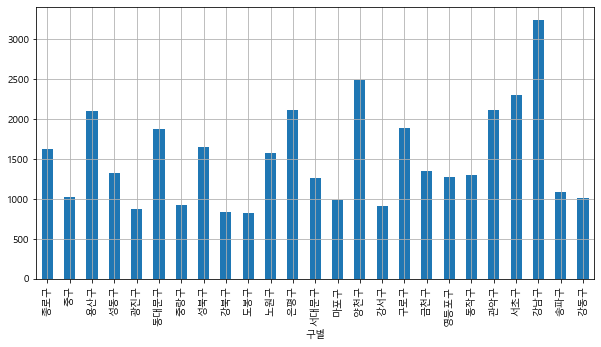

In [39]:
data_result['소계'].plot(kind="bar", figsize=(10,5), grid=True)

<AxesSubplot:ylabel='구별'>

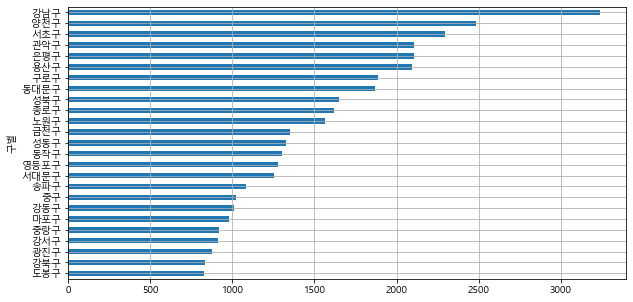

In [42]:
data_result['소계'].sort_values().plot(kind="barh", figsize=(10,5), grid=True)

### (3-2) 인구대비 CCTV 개수 확인

In [43]:
# "CCTV비율" 파생변수 추가 : (소계/인구수)*100

data_result["CCTV비율"]=data_result["소계"]/data_result["인구수"]*100
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율,CCTV비율
구별,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,0.985105
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,0.756998
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,0.421871
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230


<AxesSubplot:ylabel='구별'>

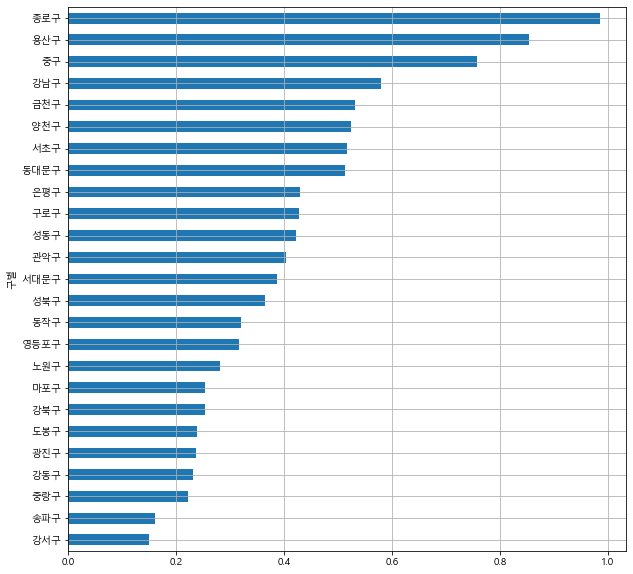

In [44]:
data_result['CCTV비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))

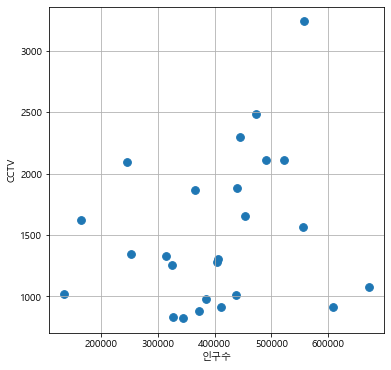

In [45]:
##### CCTV갯수와 인구 수가 서로 관계가 있는지 여부를 그래프로 확인

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=60)
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [46]:
##### 회귀선 : y=ax+b(a:기울기, b:절편)

fp1=np.polyfit(data_result['인구수'],data_result['소계'],1)#전체적인 오차를 계산해서 평균을 구해줌,1은 1차원을 의미
print(fp1)#기울기, 절편순으로 출력됨

f1=np.poly1d(fp1)#회귀선 공식을 방정식(수식)으로 만드는 함수
print(f1)

[1.10432363e-03 1.06864009e+03]
 
0.001104 x + 1069


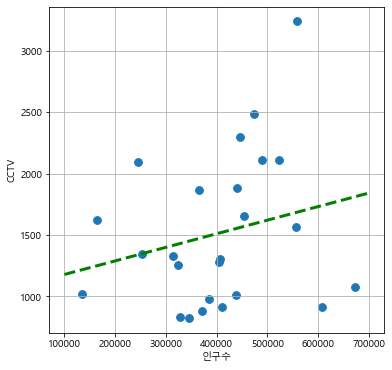

In [47]:
fx = np.linspace(100000, 700000, 100)#범위가 10만부터 70만

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=60)
#plt.plot(fx, fp1[0]*fx+fp1[1])#(x,y), x에는 x값을 넣고 y에는 회귀선 공식 그대로 작성
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()

In [48]:
##### 각 데이터의 오차를 구해서 "오차"라는 파생변수 추가

data_result['오차']=np.abs(data_result['소계']- f1(data_result['인구수']))
data_result.head()

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율,CCTV비율,오차
구별,,,,,,,,,,
종로구,164348,154549,9799,26429,5.962348,16.081121,1619,248.922414,0.985105,368.866533
중구,135139,126082,9057,21655,6.701988,16.024242,1023,147.699758,0.756998,194.877278
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
성동구,314551,306532,8019,41752,2.549348,13.273523,1327,81.780822,0.421871,89.006188
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154


In [49]:
df_sort=data_result.sort_values(by="오차", ascending=False)
df_sort

,인구수,한국인,외국인,고령자,외국인비율,고령자비율,소계,최근증가율,CCTV비율,오차
구별,,,,,,,,,,
강남구,557865,552976,4889,65859,0.876377,11.805544,3238,150.619195,0.580427,1553.296412
양천구,473087,469221,3866,56070,0.817186,11.851943,2482,34.671731,0.524639,890.918761
강서구,608361,601696,6665,77381,1.095567,12.719586,911,134.793814,0.149747,829.467513
용산구,245411,229909,15502,37238,6.316750,15.173729,2096,53.216374,0.854077,756.346747
서초구,445164,440954,4210,54055,0.945719,12.142716,2297,63.371266,0.515990,736.754790
송파구,671994,665282,6712,77978,0.998818,11.603973,1081,104.347826,0.160865,729.738939
도봉구,345041,342861,2180,54293,0.631809,15.735231,825,246.638655,0.239102,624.677016
중랑구,411552,406868,4684,59992,1.138131,14.577016,916,79.960707,0.222572,607.126685
광진구,371671,357149,14522,44470,3.907219,11.964883,878,53.228621,0.236230,601.085154


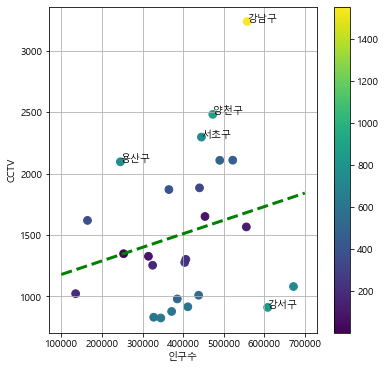

In [50]:
fx = np.linspace(100000, 700000, 100)

plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'],data_result['소계'], s=60, c=data_result['오차'])#특정값에 따라 색이 바뀌게 작성(c)
plt.plot(fx, f1(fx), lw=3, color="g", ls="dashed")
plt.xlabel("인구수")
plt.ylabel("CCTV")
plt.grid()
plt.colorbar()#오차에 따라 나타나는 색 가이드 바 추가

for n in range(5):#이름뜨게 함수 작성
    plt.text(df_sort['인구수'][n],df_sort['소계'][n], df_sort.index[n])

In [51]:
df_sort.to_csv("data/seoul/cctv_result.csv", encoding="utf-8")